In [165]:
# Import library that used in this program
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.ensemble import AdaBoostClassifier #AdaBoost
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import xgboost as xgb #XgBoost
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
# import imblearn
from imblearn.over_sampling import SMOTE
#  sklearn.naive_bayes.BernoulliNB

In [166]:
df = pd.read_csv('/content/defaultofreditcardclients.csv')

In [167]:
df.head()

Unnamed: 0         X1   X2         X3        X4   X5     X6     X7     X8  \
0         ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3   
1          1      20000    2          2         1   24      2      2     -1   
2          2     120000    2          2         2   26     -1      2      0   
3          3      90000    2          2         2   34      0      0      0   
4          4      50000    2          2         1   37      0      0      0   

      X9  ...        X15        X16        X17       X18       X19       X20  \
0  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3   
1     -1  ...          0          0          0         0       689         0   
2      0  ...       3272       3455       3261         0      1000      1000   
3      0  ...      14331      14948      15549      1518      1500      1000   
4      0  ...      28314      28959      29547      2000      2019      1200   

        X21       X22       X23                           Y  
0  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
1         0         0         0                           1  
2      1000         0      2000                           1  
3      1000      1000      5000                           0  
4      1100      1069      1000                           0  

[5 rows x 25 columns]

In [168]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header



In [169]:
df.shape

(30000, 25)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

In [171]:
df.head()

0 ID LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4  ...  \
1  1     20000   2         2        1  24     2     2    -1    -1  ...   
2  2    120000   2         2        2  26    -1     2     0     0  ...   
3  3     90000   2         2        2  34     0     0     0     0  ...   
4  4     50000   2         2        1  37     0     0     0     0  ...   
5  5     50000   1         2        1  57    -1     0    -1     0  ...   

0 BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4 PAY_AMT5  \
1         0         0         0        0      689        0        0        0   
2      3272      3455      3261        0     1000     1000     1000        0   
3     14331     14948     15549     1518     1500     1000     1000     1000   
4     28314     28959     29547     2000     2019     1200     1100     1069   
5     20940     19146     19131     2000    36681    10000     9000      689   

0 PAY_AMT6 default payment next month  
1        0                          1  
2     2000                          1  
3     5000                          0  
4     1000                          0  
5      679                          0  

[5 rows x 25 columns]

In [172]:
df.isnull().sum()

0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [173]:
atribut = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
'PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT1','BILL_AMT2','BILL_AMT3',
'BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4',
'PAY_AMT5','PAY_AMT6']
label = ['default payment next month']
X = df[atribut]
y = df[label]

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [175]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='gini')

# Fit the decision tree classifier
clf = clf.fit(X_train, y_train)

In [176]:
importances = clf.feature_importances_

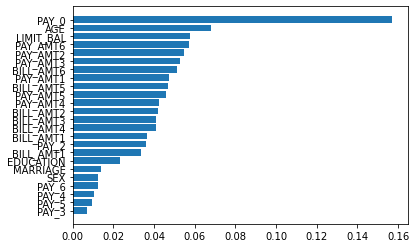

In [177]:
indices = np.argsort(importances)

# from matplotlib.pyplot import figure

# figure(figsize=(100, 12), dpi=80)
fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

In [178]:
# Lima atribut teratas
atribt_used = ['PAY_0', 'AGE', 'LIMIT_BAL', 'PAY_AMT2', 'PAY_AMT6']
X_train[atribt_used].head()

0     PAY_0 AGE LIMIT_BAL PAY_AMT2 PAY_AMT6
3226      0  44     20000        0        0
11816    -1  30    260000      274      293
7339      2  39     20000     1500        0
14981     2  23     30000      150      700
27168     0  29     10000     2000        0

In [179]:
X_train[atribt_used].dtypes

0
PAY_0        object
AGE          object
LIMIT_BAL    object
PAY_AMT2     object
PAY_AMT6     object
dtype: object

In [180]:
X_train[atribt_used] = df[atribt_used].astype(float)


In [181]:
X_test[atribt_used] = X_test[atribt_used].astype(float)

In [182]:
# xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
# xgb_model.fit(X_train[atribt_used], y_train)
# y_pred_xgb = xgb_model.predict(X_test[atribt_used])

In [183]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
svm = make_pipeline(SVC(gamma='auto'))
y_pred_svm =svm.fit(X_train[atribt_used], y_train).predict(X_test[atribt_used]) 
# > clf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [184]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
bnb = BernoulliNB()
gnb = GaussianNB()
dtr = DecisionTreeClassifier(random_state = 42)
adaBoost_model = AdaBoostClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42)
gradientBoosting_model = GradientBoostingClassifier(random_state=42)
extraTreesClassifier_model = ExtraTreesClassifier(n_estimators=42)
neigh = KNeighborsClassifier(n_neighbors=3)
randomForest_model = RandomForestClassifier(random_state=42)
logisticRegressionModel = LogisticRegression(random_state=42)

y_pred_gnb = gnb.fit(X_train[atribt_used], y_train).predict(X_test[atribt_used])
y_pred_decision_tree = dtr.fit(X_train[atribt_used], y_train).predict(X_test[atribt_used])
y_pred_adaBoost = adaBoost_model.fit(X_train[atribt_used], y_train).predict(X_test[atribt_used])
y_pred_xgb = xgb_model.fit(X_train[atribt_used], y_train).predict(X_test[atribt_used])
y_pred_gradientBoosting = gradientBoosting_model.fit(X_train[atribt_used], y_train).predict(X_test[atribt_used])
y_pred_extraTreesClassifier = extraTreesClassifier_model.fit(X_train[atribt_used], y_train).predict(X_test[atribt_used])
y_pred_gnb = bnb.fit(X_train[atribt_used], y_train).predict(X_test[atribt_used])
y_pred_neigh = neigh.fit(X_train[atribt_used], y_train).predict(X_test[atribt_used])
y_pred_randomForest = randomForest_model.fit(X_train[atribt_used], y_train).predict(X_test[atribt_used])
y_pred_logistic_regression = logisticRegressionModel.fit(X_train[atribt_used], y_train).predict(X_test[atribt_used])


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

In [185]:
print(f"Akurasi Model Gausian: {metrics.accuracy_score(y_test, y_pred_gnb)}")
print(f"Akurasi Model Decision Tree: {metrics.accuracy_score(y_test, y_pred_decision_tree)}")
print(f"Akurasi Model Ada Boost: {metrics.accuracy_score(y_test, y_pred_adaBoost)}")
print(f"Akurasi Model XgBoost: {metrics.accuracy_score(y_test, y_pred_xgb)}")
print(f"Akurasi Model Gradient Boosting: {metrics.accuracy_score(y_test, y_pred_gradientBoosting)}")
print(f"Akurasi Model Extra Tree Classifier: {metrics.accuracy_score(y_test, y_pred_extraTreesClassifier)}")
print(f"Akurasi Model Bernoulli: {metrics.accuracy_score(y_test, y_pred_gnb)}")
print(f"Akurasi Model KNN: {metrics.accuracy_score(y_test, y_pred_neigh)}")
print(f"Akurasi Model Random Forest: {metrics.accuracy_score(y_test, y_pred_randomForest)}")
print(f"Akurasi Model Logistic Regresion: {metrics.accuracy_score(y_test, y_pred_logistic_regression)}")
print(f"Akurasi Model SVM: {metrics.accuracy_score(y_test, y_pred_svm)}")


Akurasi Model Gausian: 0.78
Akurasi Model Decision Tree: 0.7253333333333334
Akurasi Model Ada Boost: 0.8283333333333334
Akurasi Model XgBoost: 0.8303333333333334
Akurasi Model Gradient Boosting: 0.8291666666666667
Akurasi Model Extra Tree Classifier: 0.7905
Akurasi Model Bernoulli: 0.78
Akurasi Model KNN: 0.7291666666666666
Akurasi Model Random Forest: 0.8055
Akurasi Model Logistic Regresion: 0.7838333333333334
Akurasi Model SVM: 0.7835


In [186]:
# Classificatin Report Gausian Navive Bayes
print("Gausian Naive Bayes")
print(classification_report(y_test, y_pred_gnb,labels=[0,1]))
print('=================================================')
print("Decision Tree")
print(classification_report(y_test, y_pred_decision_tree,labels=[0,1]))
print('=================================================')
print("Ada Boost")
print(classification_report(y_test, y_pred_adaBoost,labels=[0,1]))
print('=================================================')
print("Gradient Boosting")
print(classification_report(y_test, y_pred_gradientBoosting,labels=[0,1]))
print('=================================================')
print("Extra Tree Classifier")
print(classification_report(y_test, y_pred_extraTreesClassifier,labels=[0,1]))
print('=================================================')
print("Gausian Bernoulli")
print(classification_report(y_test, y_pred_gnb,labels=[0,1]))
print('=================================================')
print("KNN")
print(classification_report(y_test, y_pred_neigh,labels=[0,1]))
print('=================================================')
print("Random Forest")
print(classification_report(y_test, y_pred_randomForest,labels=[0,1]))
print('=================================================')
# print("")

Gausian Naive Bayes
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      4703
           1       0.48      0.26      0.33      1297

   micro avg       0.78      0.78      0.78      6000
   macro avg       0.65      0.59      0.60      6000
weighted avg       0.75      0.78      0.75      6000

Decision Tree


/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar inst

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      4703
           1       0.37      0.38      0.37      1297

   micro avg       0.73      0.73      0.73      6000
   macro avg       0.60      0.60      0.60      6000
weighted avg       0.73      0.73      0.73      6000

Ada Boost


/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


              precision    recall  f1-score   support

           0       0.84      0.96      0.90      4703
           1       0.72      0.34      0.46      1297

   micro avg       0.83      0.83      0.83      6000
   macro avg       0.78      0.65      0.68      6000
weighted avg       0.81      0.83      0.80      6000

Gradient Boosting


/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


              precision    recall  f1-score   support

           0       0.84      0.96      0.90      4703
           1       0.72      0.34      0.47      1297

   micro avg       0.83      0.83      0.83      6000
   macro avg       0.78      0.65      0.68      6000
weighted avg       0.82      0.83      0.80      6000

Extra Tree Classifier


/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar inst

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      4703
           1       0.52      0.35      0.42      1297

   micro avg       0.79      0.79      0.79      6000
   macro avg       0.68      0.63      0.64      6000
weighted avg       0.77      0.79      0.77      6000

Gausian Bernoulli
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      4703
           1       0.48      0.26      0.33      1297

   micro avg       0.78      0.78      0.78      6000
   macro avg       0.65      0.59      0.60      6000
weighted avg       0.75      0.78      0.75      6000

KNN


/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar inst

              precision    recall  f1-score   support

           0       0.80      0.87      0.83      4703
           1       0.31      0.22      0.26      1297

   micro avg       0.73      0.73      0.73      6000
   macro avg       0.56      0.54      0.55      6000
weighted avg       0.70      0.73      0.71      6000

Random Forest
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4703
           1       0.58      0.37      0.45      1297

   micro avg       0.81      0.81      0.81      6000
   macro avg       0.71      0.65      0.67      6000
weighted avg       0.78      0.81      0.79      6000



/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


In [187]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

X_train[atribt_used] = scaler.fit_transform(X_train[atribt_used])
X_test[atribt_used] = scaler.fit_transform(X_test[atribt_used])

In [188]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
bnb = BernoulliNB()
gnb = GaussianNB()
dtr = DecisionTreeClassifier(random_state = 42)
adaBoost_model = AdaBoostClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42)
gradientBoosting_model = GradientBoostingClassifier(random_state=42)
extraTreesClassifier_model = ExtraTreesClassifier(n_estimators=42)
neigh = KNeighborsClassifier(n_neighbors=3)
randomForest_model = RandomForestClassifier(random_state=42)
logisticRegressionModel = LogisticRegression(random_state=42)

y_pred_gnb = gnb.fit(X_train[atribt_used], y_train).predict(X_test[atribt_used])
y_pred_decision_tree = dtr.fit(X_train[atribt_used], y_train).predict(X_test[atribt_used])
y_pred_adaBoost = adaBoost_model.fit(X_train[atribt_used], y_train).predict(X_test[atribt_used])
y_pred_xgb = xgb_model.fit(X_train[atribt_used], y_train).predict(X_test[atribt_used])
y_pred_gradientBoosting = gradientBoosting_model.fit(X_train[atribt_used], y_train).predict(X_test[atribt_used])
y_pred_extraTreesClassifier = extraTreesClassifier_model.fit(X_train[atribt_used], y_train).predict(X_test[atribt_used])
y_pred_gnb = bnb.fit(X_train[atribt_used], y_train).predict(X_test[atribt_used])
y_pred_neigh = neigh.fit(X_train[atribt_used], y_train).predict(X_test[atribt_used])
y_pred_randomForest = randomForest_model.fit(X_train[atribt_used], y_train).predict(X_test[atribt_used])
y_pred_logistic_regression = logisticRegressionModel.fit(X_train[atribt_used], y_train).predict(X_test[atribt_used])


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

In [189]:
print(f"Akurasi Model Gausian: {metrics.accuracy_score(y_test, y_pred_gnb)}")
print(f"Akurasi Model Decision Tree: {metrics.accuracy_score(y_test, y_pred_decision_tree)}")
print(f"Akurasi Model Ada Boost: {metrics.accuracy_score(y_test, y_pred_adaBoost)}")
print(f"Akurasi Model XgBoost: {metrics.accuracy_score(y_test, y_pred_xgb)}")
print(f"Akurasi Model Gradient Boosting: {metrics.accuracy_score(y_test, y_pred_gradientBoosting)}")
print(f"Akurasi Model Extra Tree Classifier: {metrics.accuracy_score(y_test, y_pred_extraTreesClassifier)}")
print(f"Akurasi Model Bernoulli: {metrics.accuracy_score(y_test, y_pred_gnb)}")
print(f"Akurasi Model KNN: {metrics.accuracy_score(y_test, y_pred_neigh)}")
print(f"Akurasi Model Random Forest: {metrics.accuracy_score(y_test, y_pred_randomForest)}")
print(f"Akurasi Model Logistic Regresion: {metrics.accuracy_score(y_test, y_pred_logistic_regression)}")
print(f"Akurasi Model SVM: {metrics.accuracy_score(y_test, y_pred_svm)}")


Akurasi Model Gausian: 0.7851666666666667
Akurasi Model Decision Tree: 0.6975
Akurasi Model Ada Boost: 0.8271666666666667
Akurasi Model XgBoost: 0.828
Akurasi Model Gradient Boosting: 0.8273333333333334
Akurasi Model Extra Tree Classifier: 0.8091666666666667
Akurasi Model Bernoulli: 0.7851666666666667
Akurasi Model KNN: 0.7701666666666667
Akurasi Model Random Forest: 0.8126666666666666
Akurasi Model Logistic Regresion: 0.823
Akurasi Model SVM: 0.7835


In [190]:
# Classificatin Report Gausian Navive Bayes
print("Gausian Naive Bayes")
print(classification_report(y_test, y_pred_gnb,labels=[0,1]))
print('=================================================')
print("Decision Tree")
print(classification_report(y_test, y_pred_decision_tree,labels=[0,1]))
print('=================================================')
print("Ada Boost")
print(classification_report(y_test, y_pred_adaBoost,labels=[0,1]))
print('=================================================')
print("Gradient Boosting")
print(classification_report(y_test, y_pred_gradientBoosting,labels=[0,1]))
print('=================================================')
print("Extra Tree Classifier")
print(classification_report(y_test, y_pred_extraTreesClassifier,labels=[0,1]))
print('=================================================')
print("Gausian Bernoulli")
print(classification_report(y_test, y_pred_gnb,labels=[0,1]))
print('=================================================')
print("KNN")
print(classification_report(y_test, y_pred_neigh,labels=[0,1]))
print('=================================================')
print("Random Forest")
print(classification_report(y_test, y_pred_randomForest,labels=[0,1]))
print('=================================================')
print("")

Gausian Naive Bayes
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4703
           1       0.68      0.01      0.02      1297

   micro avg       0.79      0.79      0.79      6000
   macro avg       0.73      0.51      0.45      6000
weighted avg       0.76      0.79      0.69      6000

Decision Tree


/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar inst

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      4703
           1       0.33      0.40      0.36      1297

   micro avg       0.70      0.70      0.70      6000
   macro avg       0.58      0.59      0.58      6000
weighted avg       0.72      0.70      0.71      6000

Ada Boost


/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


              precision    recall  f1-score   support

           0       0.84      0.96      0.90      4703
           1       0.71      0.33      0.46      1297

   micro avg       0.83      0.83      0.83      6000
   macro avg       0.78      0.65      0.68      6000
weighted avg       0.81      0.83      0.80      6000

Gradient Boosting


/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


              precision    recall  f1-score   support

           0       0.84      0.96      0.90      4703
           1       0.70      0.35      0.47      1297

   micro avg       0.83      0.83      0.83      6000
   macro avg       0.77      0.65      0.68      6000
weighted avg       0.81      0.83      0.80      6000

Extra Tree Classifier


/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar inst

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4703
           1       0.59      0.37      0.45      1297

   micro avg       0.81      0.81      0.81      6000
   macro avg       0.72      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000

Gausian Bernoulli
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4703
           1       0.68      0.01      0.02      1297

   micro avg       0.79      0.79      0.79      6000
   macro avg       0.73      0.51      0.45      6000
weighted avg       0.76      0.79      0.69      6000

KNN


/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar inst

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      4703
           1       0.46      0.39      0.42      1297

   micro avg       0.77      0.77      0.77      6000
   macro avg       0.65      0.63      0.64      6000
weighted avg       0.76      0.77      0.76      6000

Random Forest
              precision    recall  f1-score   support

           0       0.84      0.93      0.89      4703
           1       0.61      0.37      0.46      1297

   micro avg       0.81      0.81      0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.80      6000




/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
